In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_selector, make_column_transformer

### 3 CREATING MODELS



With the EDA and cleaning of data done, we shall now move on to creating classification models to help predict the likelihood of heart disease with the predictor variables that we had mentioned before.

---------------------------------

***ATTEMPT 1 USING A NORMAL BINARY CLASSIFICATION TREE***

In [2]:
heart_train_processed = pd.read_csv('train_processed.csv')
heart_test_processed = pd.read_csv('test_processed.csv')
heart_train_processed.describe()

,Unnamed: 0,num_standard__Age,num_standard__RestingBP,num_standard__MaxHR,cat_onehot__Sex_F,cat_onehot__Sex_M,cat_onehot__RestingECG_LVH,cat_onehot__RestingECG_Normal,cat_onehot__RestingECG_ST,cat_onehot__ST_Slope_Down,cat_onehot__ST_Slope_Flat,cat_onehot__ST_Slope_Up,cat_ordinal__ChestPainType,cat_ordinal__FastingBS,cat_ordinal__ExerciseAngina,remainder__Oldpeak,remainder__HeartDisease
count,683.000000,6.830000e+02,6.830000e+02,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.00000,683.000000,683.000000,683.000000
mean,341.000000,-2.834889e-16,9.219890e-16,2.184685e-16,0.207906,0.792094,0.197657,0.616398,0.185944,0.057101,0.494876,0.448023,0.803807,0.22694,0.385066,0.809663,0.530015
std,197.309402,1.000733e+00,1.000733e+00,1.000733e+00,0.406107,0.406107,0.398524,0.486619,0.389347,0.232206,0.500340,0.497656,0.937731,0.41916,0.486968,0.943970,0.499464
min,0.000000,-2.701109e+00,-2.372396e+00,-2.639521e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.500000,0.000000
25%,170.500000,-6.750821e-01,-6.702826e-01,-7.227182e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,341.000000,7.134887e-02,-1.562363e-02,7.594943e-02,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000,1.000000
75%,511.500000,7.111468e-01,6.390353e-01,7.548169e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.00000,1.000000,1.500000,1.000000
max,682.000000,2.523908e+00,2.275683e+00,2.551819e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.00000,1.000000,3.600000,1.000000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8609077598828697
TPR Train 			: 0.850828729281768
TNR Train 			: 0.8722741433021807

FPR Train 			: 0.1277258566978193
FNR Train 			: 0.14917127071823205

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.842391304347826
TPR Train 			: 0.8207547169811321
TNR Train 			: 0.8717948717948718

FPR Train 			: 0.1282051282051282
FNR Train 			: 0.1792452830188679


<Axes: >

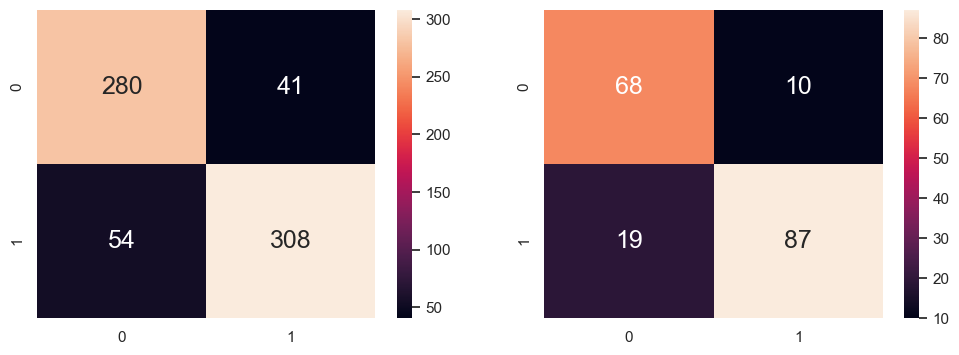

In [4]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(heart_train_processed['remainder__HeartDisease'])
X_train = pd.DataFrame(heart_train_processed[predictors])
y_test = pd.DataFrame(heart_test_processed['remainder__HeartDisease'])
X_test = pd.DataFrame(heart_test_processed[predictors]) 

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5, 0.9, 'cat_onehot__ST_Slope_Flat <= 0.5\ngini = 0.498\nsamples = 688\nvalue = [321.0, 367.0]\nclass = Heart Disease'),
 Text(0.25, 0.7, 'cat_ordinal__ChestPainType <= 0.5\ngini = 0.384\nsamples = 347\nvalue = [257, 90]\nclass = No Heart Disease'),
 Text(0.125, 0.5, 'remainder__Oldpeak <= 0.45\ngini = 0.495\nsamples = 134\nvalue = [60, 74]\nclass = Heart Disease'),
 Text(0.0625, 0.3, 'cat_ordinal__ExerciseAngina <= 0.5\ngini = 0.412\nsamples = 69\nvalue = [49, 20]\nclass = No Heart Disease'),
 Text(0.03125, 0.1, 'gini = 0.324\nsamples = 54\nvalue = [43, 11]\nclass = No Heart Disease'),
 Text(0.09375, 0.1, 'gini = 0.48\nsamples = 15\nvalue = [6, 9]\nclass = Heart Disease'),
 Text(0.1875, 0.3, 'cat_ordinal__ExerciseAngina <= 0.5\ngini = 0.281\nsamples = 65\nvalue = [11, 54]\nclass = Heart Disease'),
 Text(0.15625, 0.1, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]\nclass = Heart Disease'),
 Text(0.21875, 0.1, 'gini = 0.139\nsamples = 40\nvalue = [3, 37]\nclass = Heart Disease'),


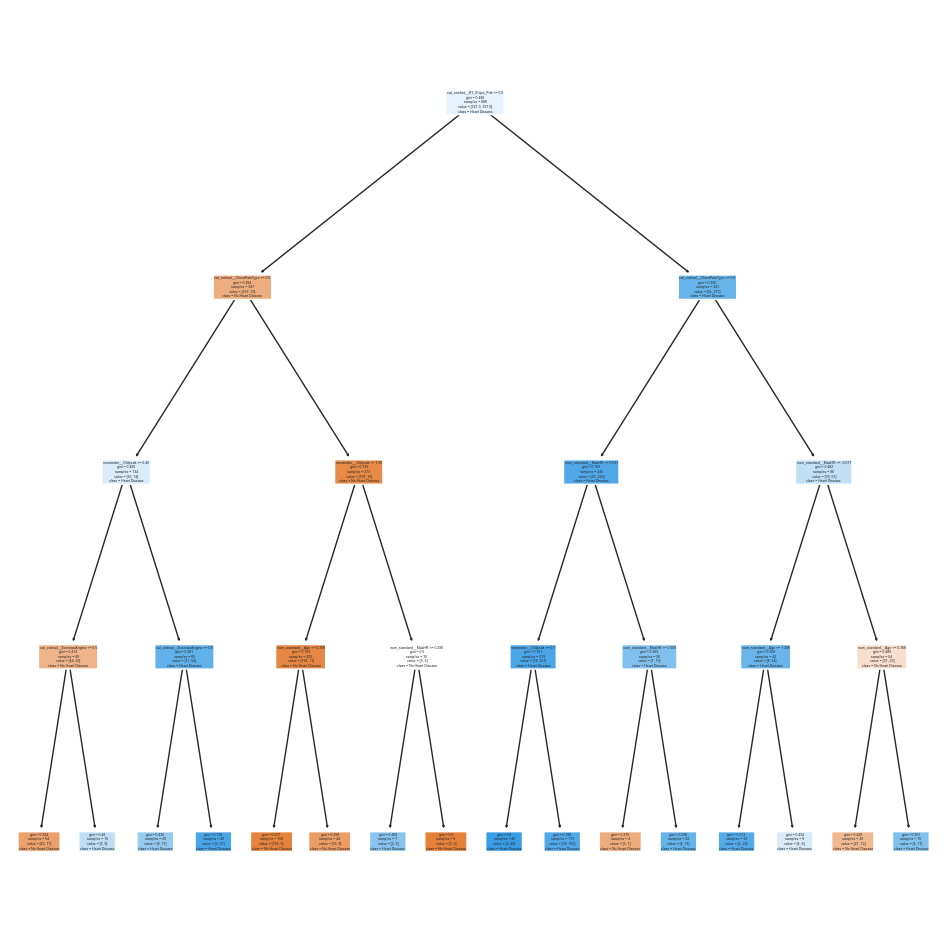

In [4]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(X_train.columns), 
          class_names=["No Heart Disease", "Heart Disease"])

Our first attempt at creating a classification model using a normal classification tree has yielded a tree with an classification accuracy of ~0.82 and a false positive rate of ~0.15. Although this is quite a respectable score, we will like to try and make our classification model even more accurate

**ATTEMPT 2 USING RANDOM FOREST CLASSIFICATION**

In [5]:
# Extract Response and Predictors
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(heart_train_processed['remainder__HeartDisease'])
X_train = pd.DataFrame(heart_train_processed[predictors]) 
y_test = pd.DataFrame(heart_test_processed['remainder__HeartDisease'])
X_test = pd.DataFrame(heart_test_processed[predictors]) 

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.remainder__HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.872093023255814
TPR Train 			: 0.888283378746594
TNR Train 			: 0.8411214953271028

FPR Train 			: 0.1588785046728972
FNR Train 			: 0.11171662125340599



<Axes: >

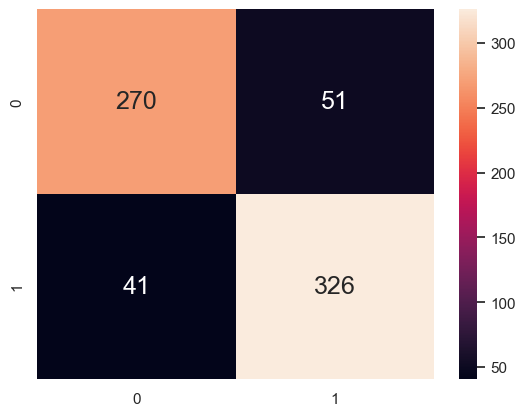

In [6]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8206521739130435
TPR Test 			: 0.8113207547169812
TNR Test 			: 0.8333333333333334

FPR Test 			: 0.16666666666666666
FNR Test 			: 0.18867924528301888


<Axes: >

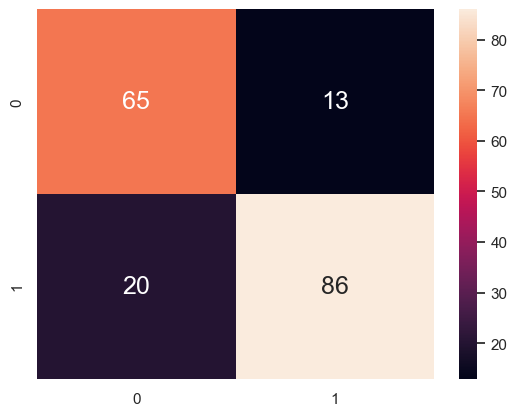

In [7]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)


# Print the Accuracy Measures from the Confusion Matrix
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**ATTEMPT 3 USING RANDOM FOREST CLASSIFICATION TREE METHOD WITH UPSAMPLING OF FEMALE DATA**

Earlier we mentioned that the data was heavily skewed towards males, I now shall try to upsample the female data and implement a random forest classification method to see if it will yield any improvements to our classification accuracy.

In [8]:
heart_train_processed['cat_onehot__Sex_M'].value_counts()


cat_onehot__Sex_M
1.0    542
0.0    146
Name: count, dtype: int64

**UPSAMPLING DATA**

As seen from above, the males in the train data is about a three times difference as compared to female. We shall try to upsample female data to make them equal.

In [45]:
# Upsample Bad to match Good for train data
from sklearn.utils import resample

heart_train_processed_male = heart_train_processed[heart_train_processed.cat_onehot__Sex_M == 1.0]
heart_train_processed_female = heart_train_processed[heart_train_processed.cat_onehot__Sex_M == 0.0]
# Upsample the Bad samples
heart_train_processed_female_up = resample(heart_train_processed_female, 
                        replace=True,                     # sample with replacement
                        n_samples=heart_train_processed_male.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
heart_train_processed_up = pd.concat([heart_train_processed_male, heart_train_processed_female_up])
 
# Check the ratio of the classes
heart_train_processed_up['cat_onehot__Sex_M'].value_counts()
 

1.0    541
0.0    541
Name: cat_onehot__Sex_M, dtype: int64

In [46]:
# Upsample Bad to match Good for test data
from sklearn.utils import resample

heart_test_processed_male = heart_test_processed[heart_test_processed.cat_onehot__Sex_M == 1.0]
heart_test_processed_female = heart_test_processed[heart_test_processed.cat_onehot__Sex_M == 0.0]
# Upsample the Bad samples
heart_test_processed_female_up = resample(heart_test_processed_female, 
                        replace=True,                     # sample with replacement
                        n_samples=heart_test_processed_male.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
heart_test_processed_up = pd.concat([heart_test_processed_male, heart_test_processed_female_up])
 
# Check the ratio of the classes
heart_test_processed_up['cat_onehot__Sex_M'].value_counts()

1.0    145
0.0    145
Name: cat_onehot__Sex_M, dtype: int64

**USING RANDOM FOREST CLASSIFICATION**

After upsampling the female data for both train and test data we will now go ahead and apply random forest classification.

In [47]:
# Extract Response and Predictors
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(heart_train_processed_up['remainder__HeartDisease'])
X_train = pd.DataFrame(heart_train_processed_up[predictors]) 
y_test = pd.DataFrame(heart_test_processed_up['remainder__HeartDisease'])
X_test = pd.DataFrame(heart_test_processed_up[predictors]) 

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.remainder__HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8595194085027726
TPR Train 			: 0.8281622911694511
TNR Train 			: 0.9215686274509803

FPR Train 			: 0.0784313725490196
FNR Train 			: 0.1718377088305489



<Axes: >

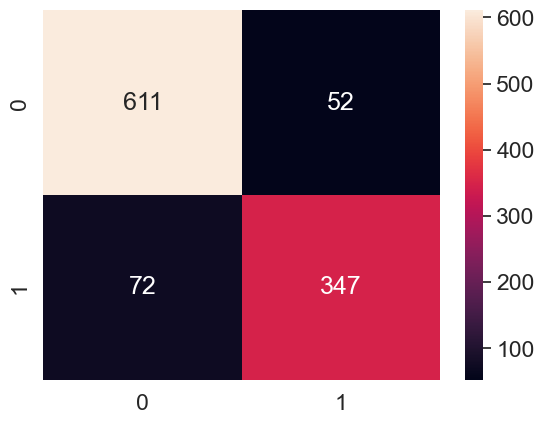

In [48]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8413793103448276
TPR Test 			: 0.7482993197278912
TNR Test 			: 0.8741258741258742

FPR Test 			: 0.1258741258741259
FNR Test 			: 0.25170068027210885


<Axes: >

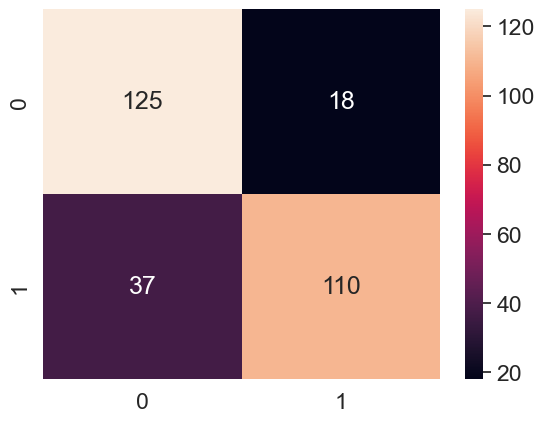

In [49]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)


# Print the Accuracy Measures from the Confusion Matrix
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

It seems that random forest model is doing slightly better than our original model with a slightly higher classification score and lower false positive and false negative rate.

**ATTEMPT 4: USING RANDOM FOREST CLASSIFICATION TREE METHOD ON MALE AND FEMALE SEPARATELY**


In [50]:
male_train = heart_train_processed[heart_train_processed['cat_onehot__Sex_F'] == 0]
male_test = heart_test_processed[heart_test_processed['cat_onehot__Sex_F'] == 0]

In [51]:
female_train = heart_train_processed[heart_train_processed['cat_onehot__Sex_F'] == 1]
female_test = heart_test_processed[heart_test_processed['cat_onehot__Sex_F'] == 1]

RANDOM FOREST ON MALE

In [52]:
# Extract Response and Predictors for Male
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(male_train['remainder__HeartDisease'])
X_train = pd.DataFrame(male_train[predictors]) 
y_test = pd.DataFrame(male_test['remainder__HeartDisease'])
X_test = pd.DataFrame(male_test[predictors]) 

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
Maleforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
Maleforest.fit(X_train, y_train.remainder__HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.866913123844732
TPR Train 			: 0.9583333333333334
TNR Train 			: 0.7902439024390244

FPR Train 			: 0.2097560975609756
FNR Train 			: 0.041666666666666664



<Axes: >

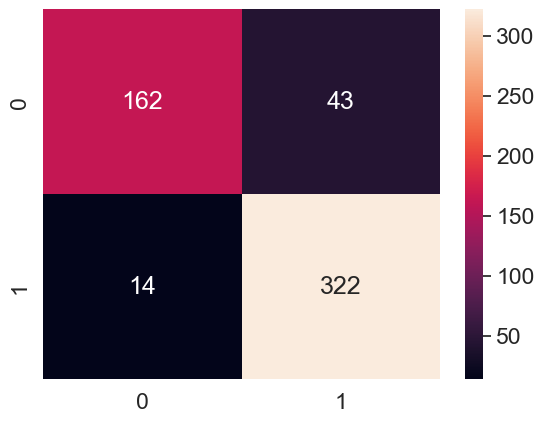

In [53]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = Maleforest.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8551724137931035
TPR Test 			: 0.9444444444444444
TNR Test 			: 0.7090909090909091

FPR Test 			: 0.2909090909090909
FNR Test 			: 0.05555555555555555


<Axes: >

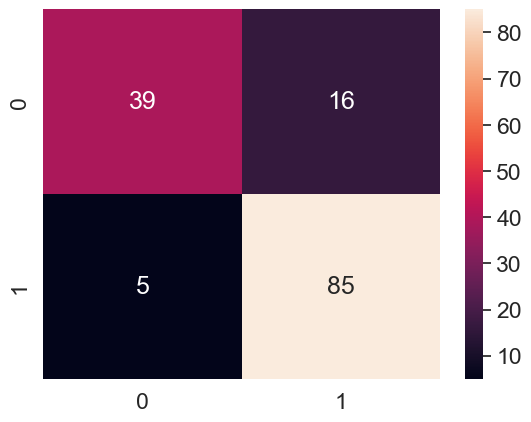

In [54]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = Maleforest.predict(X_test)


# Print the Accuracy Measures from the Confusion Matrix
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

RANDOM FOREST ON FEMALE

In [55]:
# Extract Response and Predictors for Female
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(female_train['remainder__HeartDisease'])
X_train = pd.DataFrame(female_train[predictors]) 
y_test = pd.DataFrame(female_test['remainder__HeartDisease'])
X_test = pd.DataFrame(female_test[predictors]) 

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
Femaleforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
Femaleforest.fit(X_train, y_train.remainder__HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8380281690140845
TPR Train 			: 0.7692307692307693
TNR Train 			: 0.9741379310344828

FPR Train 			: 0.02586206896551724
FNR Train 			: 0.23076923076923078



<Axes: >

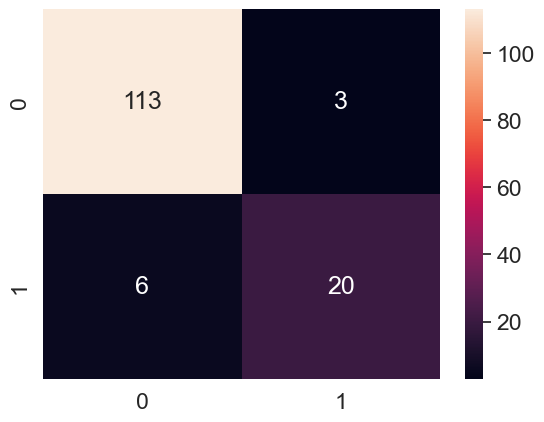

In [56]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = Femaleforest.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset


Classification Accuracy 	: 0.7948717948717948
TPR Test 			: 0.4375
TNR Test 			: 0.9130434782608695

FPR Test 			: 0.08695652173913043
FNR Test 			: 0.5625


<Axes: >

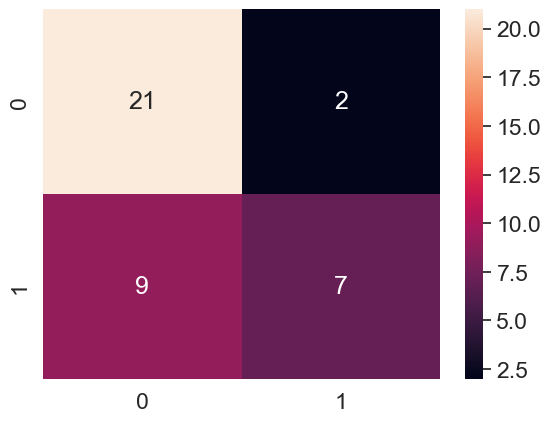

In [57]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = Femaleforest.predict(X_test)


# Print the Accuracy Measures from the Confusion Matrix
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**ATTEMPT 5 USING SUPPORT VECTOR MODEL**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8609077598828697
TPR Train 			: 0.856353591160221
TNR Train 			: 0.8006230529595015

FPR Train 			: 0.19937694704049844
FNR Train 			: 0.143646408839779



<Axes: >

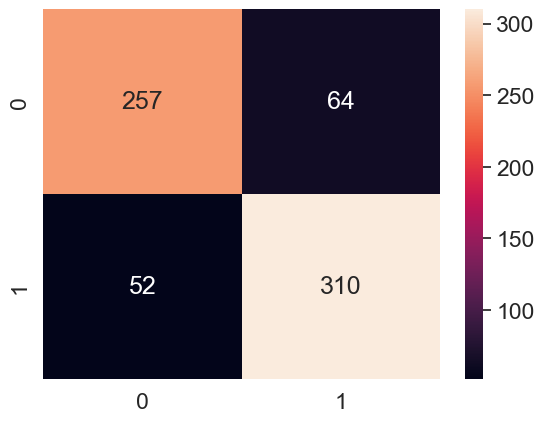

In [58]:
# Extract Response and Predictors
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(heart_train_processed['remainder__HeartDisease'])
X_train = pd.DataFrame(heart_train_processed[predictors]) 
y_test = pd.DataFrame(heart_test_processed['remainder__HeartDisease'])
X_test = pd.DataFrame(heart_test_processed[predictors]) 
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = clf.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.842391304347826
TPR Test 			: 0.8113207547169812
TNR Test 			: 0.8205128205128205

FPR Test 			: 0.1794871794871795
FNR Test 			: 0.18867924528301888


<Axes: >

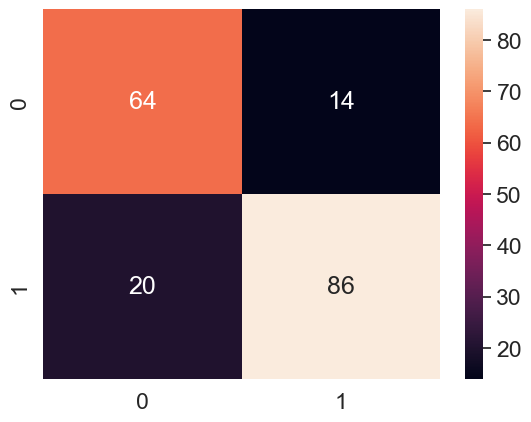

In [59]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = clf.predict(X_test)
# Print the Accuracy Measures from the Confusion Matrix
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test \t\t\t:", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 5 Finetuning the Classification models

-------

We picked the best model, the untouched random forest and now we will use Grid Search to finetune the model

In [6]:
# Extract Response and Predictors
predictors = ["num_standard__Age", "num_standard__MaxHR", "cat_ordinal__ChestPainType", "cat_ordinal__ExerciseAngina", "cat_onehot__ST_Slope_Flat", "cat_ordinal__ChestPainType","remainder__Oldpeak"]

y_train = pd.DataFrame(heart_train_processed['remainder__HeartDisease'])
X_train = pd.DataFrame(heart_train_processed[predictors]) 
y_test = pd.DataFrame(heart_test_processed['remainder__HeartDisease'])
X_test = pd.DataFrame(heart_test_processed[predictors]) 
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [45,50,55,60],
    'max_features': [2,3,4,5,6,7],
    'min_samples_leaf': [4],
    'min_samples_split': [10],
    'n_estimators': [400,450,500,525]
}
# bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100
grid_search = GridSearchCV(estimator = rforest, param_grid = param_grid, 
                          cv=3,n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print (grid_search.best_params_)
print('Best grid search score is: '+str(grid_search.best_score_))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
{'bootstrap': True, 'max_depth': 60, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 450}
Best grid search score is: 0.8447651802045496


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8609077598828697
TPR Train 			: 0.9281767955801105
TNR Train 			: 0.8566978193146417

FPR Train 			: 0.14330218068535824
FNR Train 			: 0.0718232044198895



<Axes: >

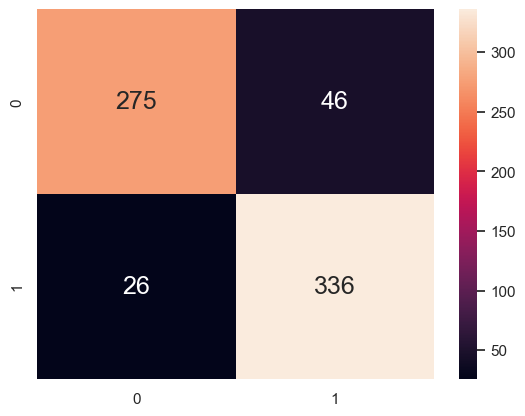

In [7]:
# Create the Random Forest object
rforest=RandomForestClassifier(max_depth=60,max_features=2,min_samples_leaf=4,min_samples_split=10,n_estimators=450)
rforest.fit(X_train, y_train)


# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print classification accuracy
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.842391304347826
TPR Train 			: 0.8867924528301887
TNR Train 			: 0.7692307692307693

FPR Train 			: 0.23076923076923078
FNR Train 			: 0.11320754716981132



<Axes: >

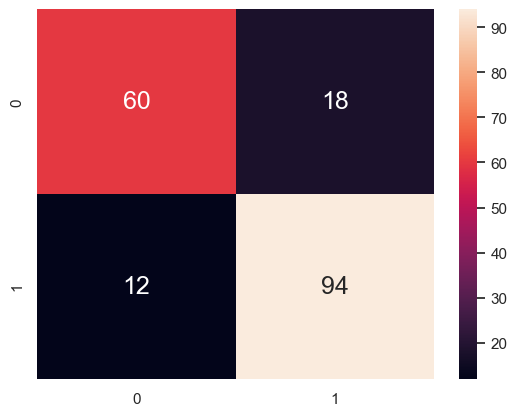

In [9]:
y_test_pred = rforest.predict(X_test)

# Print classification accuracy
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train \t\t\t:", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train \t\t\t:", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train \t\t\t:", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train \t\t\t:", (fnTrain/(tpTrain + fnTrain)))
print()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})